# Project: Analyzing Census Dataset

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
        <li><a href="#discrepancies">Discrepancies in the data</a></li>
        <ul>
            <li><a href="#rhoh">Discrepancies: Age vs Relationship to Head of House</a></li>
            <li><a href="#marital-status">Discrepancies: Marital Status by Age</a></li>
            <li><a href="#occupation">Discrepancies: Occupation by Age</a></li>
        </ul>
        <li><a href="#quality-issues">Quality Issues</a></li>
        <li><a href="#tidiness-issue">Tidiness Issue</a></li>
        <li><a href="#cleaning">Data Cleaning</a></li>
        <ul>
            <li><a href="#issue-1">Issue #1</a></li>
            <li><a href="#issue-2">Issue #2</a></li>
            <li><a href="#issue-3">Issue #3</a></li>
            <li><a href="#issue-4">Issue #4</a></li>
            <li><a href="#issue-5">Issue #5</a></li>
            <li><a href="#issue-6">Issue #6</a></li>
            <li><a href="#issue-7">Issue #7</a></li>
            <li><a href="#issue-8">Issue #8</a></li>
            <li><a href="#issue-9">Issue #9</a></li>
            <li><a href="#issue-10">Issue #10</a></li>
            <li><a href="#issue-11">Issue #11</a></li>
            <li><a href="#issue-12">Issue #12</a></li>
            <li><a href="#issue-13">Issue #13</a></li>
            <li><a href="#issue-14">Issue #14</a></li>
            <li><a href="#issue-15">Issue #15</a></li>
            <li><a href="#issue-16">Issue #16</a></li>
            <li><a href="#issue-17">Issue #17</a></li>
            <li><a href="#issue-18">Issue #18</a></li>
        </ul>
    </ul>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This is a project that analyzes a mock census dataset that contains randomly generate data using the Faker package in Python. It has been generated in a similar manner to (and designed to directly emulate the format of) the 1881 census of the UK wherein only a few questions were asked of the population.

### Dataset Description
The fields recorded are as follows:
- Street Number (this is set to “1” if it is a unique dwelling);
- Street Name;
- First Name of occupant;
- Surname of occupant;
- Age of occupant;
- Relationship to the “Head” of the household (anyone aged over 18 can be a “Head” – they are simply the person who had the responsibility to fill in the census details);
- Marital status (one of: Single, Married, Divorced, Widowed, or “NA” in the case of minors);
- Gender (one of: Male, Female; note that other responses were not implemented in 1881);
- Occupation (this field was implemented in a modern style, rather than typical 1881 occupations);
-  Infirmity (we have implemented a limited set of infirmities

In [1]:
# importing packages needed
import numpy as np
import pandas as pd

# importing packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

#importing warnings to filter warnings about SettingWithCopyWarning
import warnings
warnings.filterwarnings('ignore')


<a id='wrangling'></a>
## Data Wrangling

In [2]:
#Reading in the dataset
census_df = pd.read_csv('census_02_2022.csv')

#Making a copy of the dataset
census_df_copy = census_df.copy()

In [3]:
#checking the shape of the dataset:census_df_copy
census_df_copy.shape

(8226, 12)

In [4]:
#checking the columns of the dataset:census_df_copy
census_df_copy.columns

Index(['Unnamed: 0', 'House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [5]:
# previewing the first 5 rows in the dataset: census_df_copy
census_df_copy.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Albert Village,Maria,Wood,49.0,Head,Divorced,Female,Chiropodist,None,Catholic
1,1,2,Albert Village,Mohammed,Rose,65.0,Head,Widowed,Male,"Lecturer, further education",None,None
2,2,3,Albert Village,Joe,Smith,23.0,Head,Single,Male,"Investment banker, operational",None,None
3,3,3,Albert Village,Zoe,Daly,61.0,None,Single,Female,"Scientist, research (medical)",None,None
4,4,3,Albert Village,Dominic,Naylor,54.0,None,Single,Male,Microbiologist,None,Christian


In [6]:
# previewing the last 5 rows in the dataset: census_df_copy
census_df_copy.tail()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8221,8221,1,King Spire,Martyn,Robinson,2.0,Son,NaN,Male,Child,None,NaN
8222,8222,1,King Spire,Matthew,Hunt,59.0,Lodger,Single,Male,"Biochemist, clinical",None,Christian
8223,8223,1,King Spire,Victoria,Charlton,23.0,Sibling,Single,Female,Chartered loss adjuster,None,None
8224,8224,1,King Spire,Wayne,Mason,44.0,Lodger,Single,Male,Arboriculturist,None,Catholic
8225,8225,1,Craig Haven,Philip,Smith,59.0,Head,Single,Male,"Research officer, government",None,None


In [7]:
# Getting info about the data: census_df_copy
census_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8226 entries, 0 to 8225
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8226 non-null   int64  
 1   House Number                   8226 non-null   object 
 2   Street                         8226 non-null   object 
 3   First Name                     8226 non-null   object 
 4   Surname                        8226 non-null   object 
 5   Age                            8226 non-null   float64
 6   Relationship to Head of House  8226 non-null   object 
 7   Marital Status                 6258 non-null   object 
 8   Gender                         8226 non-null   object 
 9   Occupation                     8226 non-null   object 
 10  Infirmity                      8226 non-null   object 
 11  Religion                       6199 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage

In [8]:
# Checking 5 random row samples in the dataset:census_df_copy
census_df_copy.sample(5)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5186,5186,39,High Streets,Judith,Howarth,37.0,Head,Married,Female,Aeronautical engineer,None,Methodist
6673,6673,20,Clarke Track,Karen,Walker,35.0,None,Single,Female,Theatre director,None,Christian
6241,6241,16,Webb Bridge,Tina,Mitchell,85.0,Head,Married,Female,Retired Fast food restaurant manager,None,Christian
4971,4971,26,Penny Drive,Helen,Taylor,47.0,Head,Widowed,Female,"Geologist, wellsite",None,Methodist
7261,7261,12,Williams Street,Conor,Johnson,41.0,Partner,Single,Male,Architectural technologist,None,None


In [9]:
#checking for duplicates in the dataset:census_df_copy
census_df_copy.duplicated().sum()

0

In [10]:
#checking for missing values in each column in the dataset:census_df_copy
census_df_copy.isnull().sum()

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1968
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2027
dtype: int64

In [11]:
#checking number of unique values in each column in the dataset:census_df_copy
census_df_copy.nunique()

Unnamed: 0                       8226
House Number                      202
Street                            105
First Name                        364
Surname                           661
Age                               109
Relationship to Head of House      22
Marital Status                      8
Gender                              9
Occupation                       1052
Infirmity                           8
Religion                           15
dtype: int64

In [12]:
#checking the unique values of the "House Number" column
census_df_copy["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [13]:
#inspecting the row with "Four" as the "House Number"
census_df_copy.query("`House Number` == 'Four'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8069,8069,Four,Wakefield Cove,Georgia,Baker,83.0,Head,Widowed,Female,Retired Radiation protection practitioner,None,Christian


In [14]:
# check if there are any rows with "House Number" as "4" and "Street" as "Wakefield Cove"
census_df_copy.query("`House Number` == '4' and `Street` == 'Wakefield Cove'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [15]:
# checking that there are other rows with "Street" as "Wakefield Cove"
census_df_copy.query("`Street` == 'Wakefield Cove'").head(3)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8065,8065,1,Wakefield Cove,Louise,Stewart,35.0,Head,Single,Female,Research scientist (life sciences),None,Christian
8066,8066,2,Wakefield Cove,Megan,Burns,34.0,Head,Single,Female,Retail banker,None,Methodist
8067,8067,3,Wakefield Cove,Elizabeth,Potts,49.0,Head,Single,Female,Politician's assistant,None,Methodist


In [16]:
#checking that the top three house numbers falls between 1 and 5
census_df_copy["House Number"].value_counts()[:3]

1    328
2    259
4    250
Name: House Number, dtype: int64

In [17]:
#checking the unique values of the "Street" column in ascending order
sorted(census_df_copy["Street"].unique())

['Alba Drive',
 'Albert Village',
 'Ali Ways',
 'Andrews Wells',
 'April Road',
 'Archer Ridges',
 'Arthurfold Street',
 'Ascension Hold',
 'Baker Drive',
 'Birmingham Avenue',
 'Bletchleybird Drive',
 'Breakfast Avenue',
 'Bryant Ranch',
 'Butler Harbor',
 'Calendar Ranch',
 'Campbell Tunnel',
 'Cancer Abbey',
 'Cardiff Avenue',
 'Castor Lane',
 'Charity Flats',
 'Chester Views',
 'Clarke Track',
 'Clementine Street',
 'Coin Street',
 'Conifer Manor',
 'Craig Haven',
 'Davis Hills',
 'Doherty Valley',
 'Duchess Castle',
 'Duffy Ramp',
 'Easter Street',
 'Exchange Road',
 'Gallows Avenue',
 'Gilbert Inlet',
 'Gregory Cove',
 'Guild Parkway',
 'Harper Trail',
 'Harris Lane',
 'Hawkins Course',
 'Hayes Harbors',
 'Hazel Lane',
 'Henge Lane',
 'Hewitt Points',
 'Hicks Court',
 'High Streets',
 'Holmes Lights',
 'Hullpond Street',
 'Hyde Cottage',
 'Innerfast Lane',
 'Jarvis Avenue',
 'Jarvis Parkways',
 'Jones Ramp',
 'King Spire',
 'Laurel Valley',
 'Lawrence Point',
 'Lewis Abbey',
 'Lo

In [18]:
#checking the unique values of the "First Name" column in ascending order
sorted(census_df_copy["First Name"].unique())

['Aaron',
 'Abbie',
 'Abdul',
 'Abigail',
 'Adam',
 'Adrian',
 'Aimee',
 'Alan',
 'Albert',
 'Alex',
 'Alexander',
 'Alexandra',
 'Alice',
 'Alison',
 'Allan',
 'Amanda',
 'Amber',
 'Amelia',
 'Amy',
 'Andrea',
 'Andrew',
 'Angela',
 'Ann',
 'Anna',
 'Anne',
 'Annette',
 'Anthony',
 'Antony',
 'Arthur',
 'Ashleigh',
 'Ashley',
 'Barbara',
 'Barry',
 'Ben',
 'Benjamin',
 'Bernard',
 'Beth',
 'Bethan',
 'Bethany',
 'Beverley',
 'Billy',
 'Bradley',
 'Brandon',
 'Brenda',
 'Brett',
 'Brian',
 'Bruce',
 'Bryan',
 'Callum',
 'Cameron',
 'Carl',
 'Carly',
 'Carol',
 'Carole',
 'Caroline',
 'Carolyn',
 'Catherine',
 'Charlene',
 'Charles',
 'Charlie',
 'Charlotte',
 'Chelsea',
 'Cheryl',
 'Chloe',
 'Christian',
 'Christine',
 'Christopher',
 'Claire',
 'Clare',
 'Clifford',
 'Clive',
 'Colin',
 'Connor',
 'Conor',
 'Craig',
 'Dale',
 'Damian',
 'Damien',
 'Daniel',
 'Danielle',
 'Danny',
 'Darren',
 'David',
 'Dawn',
 'Dean',
 'Deborah',
 'Debra',
 'Declan',
 'Denis',
 'Denise',
 'Dennis',
 '

In [19]:
#checking the unique values of the "Surname" column in ascending order
sorted(census_df_copy["Surname"].unique())

[' ',
 'Abbott',
 'Adams',
 'Adams-Bevan',
 'Ahmed',
 'Akhtar',
 'Alexander',
 'Ali',
 'Allan',
 'Allen',
 'Anderson',
 'Anderson-Tucker',
 'Andrews',
 'Archer',
 'Armstrong',
 'Arnold',
 'Arnold-Allen',
 'Ashton',
 'Atkins',
 'Atkinson',
 'Atkinson-Fraser',
 'Atkinson-Young',
 'Austin',
 'Bailey',
 'Bailey-George-Webb-Anderson',
 'Bailey-Mills',
 'Baker',
 'Baker-Holmes',
 'Baldwin',
 'Ball',
 'Banks',
 'Barber',
 'Barker',
 'Barlow',
 'Barnes',
 'Barnett',
 'Barrett',
 'Barry',
 'Bartlett',
 'Barton',
 'Bates',
 'Bates-Robinson',
 'Baxter',
 'Begum',
 'Begum-Burke',
 'Begum-Martin',
 'Bell',
 'Bell-Hill',
 'Bennett',
 'Bennett-Jarvis',
 'Benson',
 'Bentley',
 'Berry',
 'Berry-Stephens',
 'Bevan',
 'Bevan-Byrne',
 'Bibi',
 'Birch',
 'Bird',
 'Bishop',
 'Black',
 'Black-Harrison',
 'Blackburn',
 'Blake',
 'Blake-Burns',
 'Bolton',
 'Bond',
 'Booth',
 'Bowen',
 'Boyle',
 'Bradley',
 'Bradley-Bennett',
 'Bradley-Hyde',
 'Bradshaw',
 'Brady',
 'Bray',
 'Brennan',
 'Briggs',
 'Brookes',
 '

In [20]:
# checking the age statistics
census_df_copy["Age"].describe()

count    8226.000000
mean       35.491435
std        21.329798
min         0.000000
25%        18.000000
50%        34.000000
75%        50.000000
max       105.000000
Name: Age, dtype: float64

In [21]:
#checking the unique values of the "Relationship to Head of House" column in ascending order
sorted(census_df_copy["Relationship to Head of House"].unique())

['Adopted Daughter',
 'Adopted Granddaughter',
 'Adopted Grandson',
 'Adopted Son',
 'Cousin',
 'Daughter',
 'Daughter-in-law',
 'Granddaughter',
 'Grandson',
 'Head',
 'Husband',
 'Lodger',
 'Neice',
 'Nephew',
 'None',
 'Partner',
 'Sibling',
 'Son',
 'Step-Daughter',
 'Step-Son',
 'Visitor',
 'Wife']

In [22]:
#checking the unique values of the "Marital Status" column
census_df_copy["Marital Status"].unique()

array(['Divorced', 'Widowed', 'Single', 'Married', nan, 'D', 'M', 'W',
       'S'], dtype=object)

In [23]:
#checking the unique values of the "Gender" column
census_df_copy["Gender"].unique()

array(['Female', 'Male', 'male', 'M', 'female', 'f', 'F', ' ', 'm'],
      dtype=object)

In [24]:
#checking the unique values of the "Occupation" column in ascending order
sorted(census_df_copy["Occupation"].unique())

['Academic librarian',
 'Accommodation manager',
 'Accountant, chartered',
 'Accountant, chartered certified',
 'Accountant, chartered management',
 'Accountant, chartered public finance',
 'Accounting technician',
 'Actor',
 'Actuary',
 'Acupuncturist',
 'Administrator',
 'Administrator, Civil Service',
 'Administrator, arts',
 'Administrator, charities/voluntary organisations',
 'Administrator, education',
 'Administrator, local government',
 'Administrator, sports',
 'Adult guidance worker',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising art director',
 'Advertising copywriter',
 'Advice worker',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural engineer',
 'Aid worker',
 'Air broker',
 'Air cabin crew',
 'Air traffic controller',
 'Airline pilot',
 'Ambulance person',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animal technologist',
 'Animator',
 'Applications developer',
 'Arboricul

In [25]:
# checking for invalid entries spotted as unique entries in the "Occupation" column
print("Copy" in census_df_copy["Occupation"].unique())
print("Make" in census_df_copy["Occupation"].unique())
print("Land" in census_df_copy["Occupation"].unique())
print("Sub" in census_df_copy["Occupation"].unique())

True
True
True
True


In [26]:
#investigating rows with "Copy" as their occupation
census_df_copy.query("`Occupation` == 'Copy'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
844,844,12,Doherty Valley,Henry,Curtis,30.0,Husband,Married,Male,Copy,None,None
2334,2334,18,Stephenson Views,Lawrence,Rahman,34.0,Lodger,Single,Male,Copy,None,Christian
4389,4389,17,Harris Lane,Fiona,Richardson,26.0,Head,Single,Female,Copy,None,Catholic
4906,4906,7,Penny Drive,Ricky,James,51.0,Husband,Married,Male,Copy,None,Catholic
6534,6534,15,Murray River,Shaun,Jordan,23.0,Lodger,Divorced,Male,Copy,None,None
6589,6589,36,Murray River,Connor,Wilkins,32.0,Head,Married,Male,Copy,None,None
6928,6928,10,Paris Lane,Ian,Moore,59.0,Partner,Single,Male,Copy,None,None
7944,7944,27,Conifer Manor,Gerard,Carter,49.0,Head,Single,Male,Copy,None,None


In [27]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '12' and `Street` == 'Doherty Valley'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
843,843,12,Doherty Valley,Annette,Curtis,28.0,Head,Married,Female,Insurance risk surveyor,None,None
844,844,12,Doherty Valley,Henry,Curtis,30.0,Husband,Married,Male,Copy,None,None


In [28]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '18' and `Street` == 'Stephenson Views'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2331,2331,18,Stephenson Views,Sara,Morris,38.0,Head,Single,Female,Unemployed,Unknown Infection,Christian
2332,2332,18,Stephenson Views,Claire,Smith,18.0,Lodger,Single,Female,Student,None,NaN
2333,2333,18,Stephenson Views,Dennis,Cox,60.0,Lodger,Single,Male,Sport and exercise psychologist,None,Christian
2334,2334,18,Stephenson Views,Lawrence,Rahman,34.0,Lodger,Single,Male,Copy,None,Christian


In [29]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '17' and `Street` == 'Harris Lane'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4389,4389,17,Harris Lane,Fiona,Richardson,26.0,Head,Single,Female,Copy,None,Catholic
4390,4390,17,Harris Lane,Vincent,Hancock,27.0,Partner,Single,Male,Art therapist,None,Catholic
4391,4391,17,Harris Lane,Maria,Richardson,6.0,Daughter,NaN,Female,Student,None,NaN
4392,4392,17,Harris Lane,Janet,Richardson,3.0,Daughter,NaN,Female,Child,None,NaN
4393,4393,17,Harris Lane,Georgina,Bell,63.0,Lodger,Single,Female,"Administrator, charities/voluntary organisations",None,Catholic


In [30]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '7' and `Street` == 'Penny Drive'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4905,4905,7,Penny Drive,Kathleen,James,50.0,Head,Married,Female,Unemployed,None,Catholic
4906,4906,7,Penny Drive,Ricky,James,51.0,Husband,Married,Male,Copy,None,Catholic
4907,4907,7,Penny Drive,Thomas,James,24.0,Son,Single,Male,Data processing manager,None,Catholic


In [31]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '15' and `Street` == 'Murray River'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6531,6531,15,Murray River,Chelsea,Lyons,37.0,Head,Married,f,Arts development officer,None,None
6532,6532,15,Murray River,Ian,Lyons,36.0,Husband,Married,Male,Camera operator,None,None
6533,6533,15,Murray River,Christian,Lyons,0.0,Son,NaN,Male,Child,None,NaN
6534,6534,15,Murray River,Shaun,Jordan,23.0,Lodger,Divorced,Male,Copy,None,None


In [32]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '10' and `Street` == 'Paris Lane'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6927,6927,10,Paris Lane,Amanda,Steele,57.0,Head,Single,Female,Magazine features editor,None,None
6928,6928,10,Paris Lane,Ian,Moore,59.0,Partner,Single,Male,Copy,None,None
6929,6929,10,Paris Lane,Edward,Steele,31.0,Son,Single,Male,"Teacher, music",None,None
6930,6930,10,Paris Lane,Kerry,Steele,29.0,Daughter,Single,Female,Mechanical engineer,None,None
6931,6931,10,Paris Lane,Teresa,Steele,27.0,Daughter,Single,Female,Water quality scientist,None,None
6932,6932,10,Paris Lane,Tony,Steele,21.0,Son,Single,Male,University Student,None,None
6933,6933,10,Paris Lane,Gavin,Steele,9.0,Son,NaN,Male,Student,None,NaN


In [33]:
#investigating rows containing house number and street name of individuals with "Copy" as their occupation
census_df_copy.query("`House Number` == '27' and `Street` == 'Conifer Manor'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7944,7944,27,Conifer Manor,Gerard,Carter,49.0,Head,Single,Male,Copy,None,None


In [34]:
#checking the unique values of the "Infirmity" column
census_df_copy["Infirmity"].unique()

array(['None', 'Unknown Infection', 'Physical Disability', 'Deaf',
       'Blind', 'Mental Disability', 'Disabled', ' '], dtype=object)

In [35]:
#checking the unique values of the "Religion" column
census_df_copy["Religion"].unique()

array(['Catholic', 'None', 'Christian', 'Muslim', 'Methodist', nan,
       'Sikh', 'Jewish', 'Private', 'Jedi', 'Hindu', 'Agnostic', 'Bahai',
       ' ', 'Undecided', 'Sith'], dtype=object)

<a id='discrepancies'></a>
### Discrepancies in the data

> Check for discrepancies in the dataset using the age column against other columns, such as; 
> - Relationship to Head of House
> - Marital Status
> - Occupation

<a id='rhoh'></a>
#### Discrepancies: Age vs Relationship to Head of House

In [36]:
# checking for discrepancies among people below 18 years
census_df_copy.query("`Age` < 18 and `Relationship to Head of House` == 'Head'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6867,6867,40,Thompson Ferry,Christine,Harris,17.0,Head,Single,Female,Unemployed,None,NaN
6920,6920,9,Paris Lane,Ellie,Jackson,17.0,Head,Single,Female,Unemployed,None,NaN


In [37]:
# inspecting rows with the same house number and street name as those showing discrepancy in the age vs Relationship to Head of House
census_df_copy.query("`House Number` == '40' and `Street` == 'Thompson Ferry'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6867,6867,40,Thompson Ferry,Christine,Harris,17.0,Head,Single,Female,Unemployed,None,NaN
6868,6868,40,Thompson Ferry,Thomas,Dyer,22.0,Lodger,Single,Male,University Student,None,None
6869,6869,40,Thompson Ferry,Michael,Moore,20.0,Lodger,Widowed,Male,Press sub,None,Catholic
6870,6870,40,Thompson Ferry,Victor,Ward,32.0,Lodger,Single,Male,"Optician, dispensing",None,Methodist


In [38]:
## inspecting rows with the same house number and street name as those showing discrepancy in the age vs Relationship to Head of House
census_df_copy.query("`House Number` == '9' and `Street` == 'Paris Lane'")

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6920,6920,9,Paris Lane,Ellie,Jackson,17.0,Head,Single,Female,Unemployed,None,NaN
6921,6921,9,Paris Lane,Harriet,Jackson,0.0,Daughter,NaN,Female,Child,None,NaN
6922,6922,9,Paris Lane,Linda,Jackson,0.0,Daughter,NaN,Female,Child,None,NaN
6923,6923,9,Paris Lane,Nigel,Price,46.0,Lodger,Single,Male,"Education officer, museum",None,Catholic
6924,6924,9,Paris Lane,Peter,Cole,41.0,Lodger,Single,Male,Event organiser,None,None
6925,6925,9,Paris Lane,Jonathan,Evans,61.0,Lodger,Single,Male,Warehouse manager,None,Christian
6926,6926,9,Paris Lane,Katy,Lane,19.0,Lodger,Single,Female,University Student,None,Christian


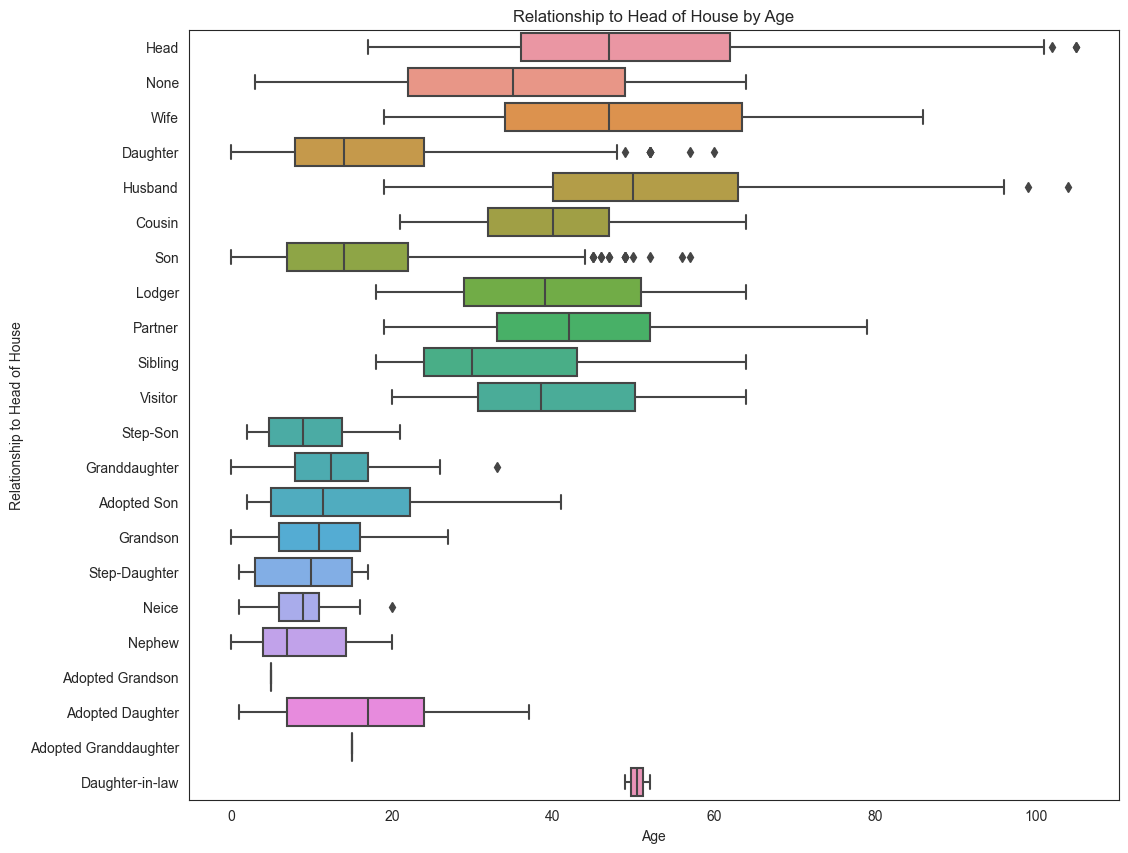

In [39]:
# Visual representation of "Age" vs "Relationship to Head of House"
plt.figure(figsize=(12, 10))
agevsrel=sns.boxplot(data=census_df_copy, x="Age", y="Relationship to Head of House")
plt.title("Relationship to Head of House by Age");

In [40]:
agevsrel.get_figure().savefig('./age_rel.png')

<a id='marital-status'></a>
#### Discrepancies: Marital Status by Age

In [41]:
# checking for discrepancies among people below 16 years
census_df_copy.query("`Age` < 16")["Marital Status"].value_counts(dropna=False)

NaN    1724
Name: Marital Status, dtype: int64

In [42]:
# checking for discrepancies among people between 16  and 17 years
census_df_copy.query("`Age` >= 16 and `Age` < 18")["Marital Status"].value_counts(dropna=False)

NaN       244
Single      2
Name: Marital Status, dtype: int64

In [43]:
# checking for discrepancies among people that are 18 years
census_df_copy.query("`Age` == 18")["Marital Status"].value_counts(dropna=False)

Single      103
Divorced     20
Married       6
Widowed       4
Name: Marital Status, dtype: int64

In [44]:
# checking for discrepancies among 18 years and above
census_df_copy.query("`Age` >= 18")["Marital Status"].value_counts(dropna=False)

Single      2957
Married     2213
Divorced     757
Widowed      318
M              7
D              2
W              1
S              1
Name: Marital Status, dtype: int64

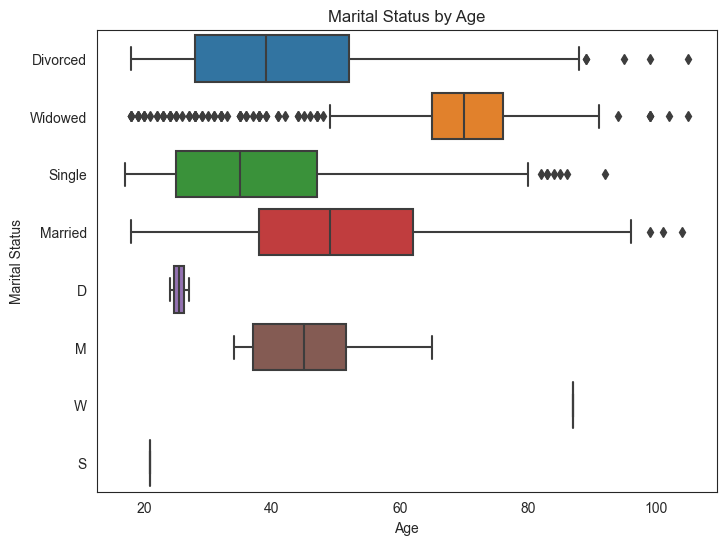

In [45]:
# Visual representation of "Age" vs "Marital Status"
plt.figure(figsize=(8, 6))
age_mar=sns.boxplot(data=census_df_copy, x="Age", y="Marital Status")
plt.title("Marital Status by Age")
age_mar.get_figure().savefig('age_mar.png');

<a id='occupation'></a>
#### Discrepancies: Occupation by Age

In [46]:
# checking for discrepancies among people below 16 years
census_df_copy.query("`Age` < 16")["Occupation"].value_counts()

Student    1260
Child       464
Name: Occupation, dtype: int64

In [47]:
# checking for discrepancies among people between 16  and 17 years
census_df_copy.query("`Age` >= 16 and `Age` < 18")["Occupation"].value_counts()

Student       244
Unemployed      2
Name: Occupation, dtype: int64

In [48]:
# checking for discrepancies among people above 65 years
census_df_copy.query("`Age` > 65")["Occupation"].value_counts()

Unemployed                               47
Retired Art therapist                     5
Retired Structural engineer               4
Retired Television floor manager          4
Retired Optician, dispensing              4
                                         ..
Podiatrist                                1
Retired Orthoptist                        1
Retired Scientist, research (medical)     1
Retired Buyer, retail                     1
Retired Publishing rights manager         1
Name: Occupation, Length: 503, dtype: int64

<a id='quality-issues'></a>
### Quality Issues
1. Wrong entry of "four" in the `House Number` column
2. Wrong datatype for the `House Number` column
3. Empty entry or entries in the `Surname` column
4. Wrong datatype for the `Age` column
5. Misspelt **Niece** as **Neice** in the `Relationship to Head of House` column.
6. Duplicate representation of *'Divorced', 'Widowed', 'Single', 'Married'* as *'D', 'M', 'W','S'* in `Marital Status` column
7. Duplicate representation of *'Female' and 'Male'* in the `Gender` column
8. Empty entry or entries in the `Gender` column
9. Invalid entries of "Copy", "Land", "Make",and "Sub" in the `Occupation` column
9. Too many unique entries in the `Occupation` column
10. Empty entry or entries in the `Infirmity` colum
11. Too many classes of infirmity
12. Duplicate representation of christian for religion and wrong entry such as "Private" for religion
11. Two 17 years old minors were listed as head
12. Inconsistent `Marital Status` entries for people below 18 years 
13. Four entries of 18 years olds are widowed and twenty entries of 18 years olds are divorced 
15. Inconsistent `Occupation` entries for people below 18 years 
16. Entries of "unemployed" as occupation for people above 65.
17. Missing entries in `Religion` and `Marital Status` columns.
18. Inconsistence column naming format.

<a id='tidiness-issue'></a>
### Tidiness Issue
1. Irrelevant column; `Unnamed: 0`

<a id='cleaning'></a>
### Data Cleaning

<a id='issue-1'></a>
#### Issue #1
**Tidiness**

_Irrelevant column; `Unnamed: 0`_

##### Define
- Remove the `Unnamed` column

#### Code

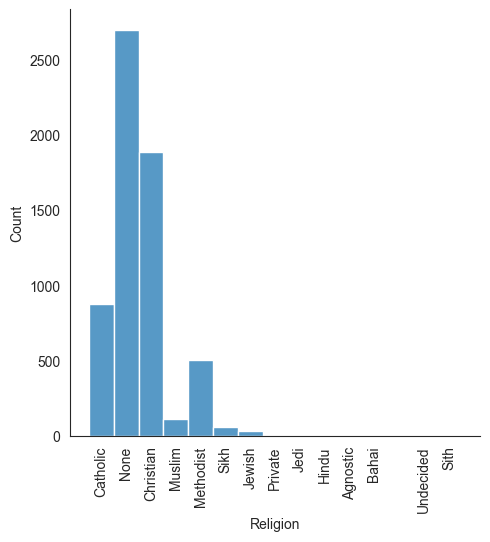

In [49]:
plot=sns.displot(census_df['Religion'],bins=10)
plot.set_xticklabels( rotation=90)
plot.savefig('religion.png');

In [50]:
# dropping the Unnamed column
census_df_copy.drop("Unnamed: 0", axis=1, inplace=True)

#### Test

In [51]:
# checking to see that "Unnamed: 0" is no longer a column in the dataset
census_df_copy.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

<a id='issue-2'></a>
#### Issue #2
**Quality**

_Wrong entry of "four" in the House Number column_

##### Define
- Get the index location where the House Number is "Four"
- Replace "Four" with 4 in the House Number column

##### Code

In [52]:
# getting the index location of the entry "Four" in House Number column
index_of_four = census_df_copy.query("`House Number` == 'Four'").index[0]

# replacing "Four" with "4" 
census_df_copy.iloc[index_of_four, 0] = "4"

#### Test

In [53]:
#checking the unique values of the "House Number" column
census_df_copy["House Number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

<a id='issue-3'></a>
#### Issue #3
**Quality**

_Wrong datatype for the House Number column_

#### Define
- Change the datatype of the "House Number" column from str to int

#### Code

In [54]:
# using the .astype function of the Series class to change "House Number" datatype
census_df_copy["House Number"] = census_df_copy["House Number"].astype(int)

#### Test

In [55]:
census_df_copy["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [56]:
census_df_copy["House Number"].dtype

dtype('int32')

<a id='issue-4'></a>
#### Issue #4
**Quality**

_Empty entry or entries in the Surname column_

#### Define
- Replace empty values in surname by inference based on other attributes such as; `House Number`, `Street` and `Relationship to Head of House` .
- If inference cannot suffice, replace empty values with "Unknown"

In [57]:
#looking into the row whose surname was empty
census_df_copy.query("`Surname` == ' '")

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2311,10,Stephenson Views,Adrian,,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


In [58]:
# checking the rows that has the same house number and street name for inference
census_df_copy.query("`House Number` == 10 and `Street` == 'Stephenson Views'")

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2307,10,Stephenson Views,Jodie,Curtis,38.0,Head,Single,Female,Retail manager,None,None
2308,10,Stephenson Views,Bethan,Stanley,60.0,None,Single,Female,Research scientist (life sciences),None,Christian
2309,10,Stephenson Views,Phillip,Allan,31.0,None,Single,Male,Drilling engineer,None,None
2310,10,Stephenson Views,Charlie,Jones,22.0,None,Single,Male,University Student,None,None
2311,10,Stephenson Views,Adrian,,59.0,None,Single,Male,"Engineer, civil (consulting)",None,Christian


In [59]:
# replacing the empty surname with "Unknown"
census_df_copy.iloc[2311, 3] = "Unknown"

#### Test

In [60]:
# checking that the empty entry in no longer among the unique values of surname
" " in census_df_copy["Surname"].unique()

False

In [61]:
# checking that "Unknown" is now an entry among the unique values of surname
"Unknown" in census_df_copy["Surname"].unique()

True

<a id='issue-5'></a>
#### Issue #5
**Quality**

_Wrong datatype for the Age column_


#### Define
- Change the datatype of the "Age" column from float to int

#### Code

In [62]:
# using the .astype function of the Series class to change "Age" datatype
census_df_copy["Age"] = census_df_copy["Age"].astype(int)

#### Test

In [63]:
census_df_copy["Age"].dtype

dtype('int32')

<a id='issue-6'></a>
#### Issue #6
**Quality**

_Misspelt Niece as Neice in the Relationship to Head of House column_

#### Define
- Replace "Neice" with "Niece"  

#### Code

In [64]:
# replacing "Neice" with "Niece" in the Relationship to Head of House column
census_df_copy["Relationship to Head of House"] = census_df_copy["Relationship to Head of House"].str.replace("Neice", "Niece")

#### Test

In [65]:
# checking that "Neice" has been corrected to "Niece"
sorted(census_df_copy["Relationship to Head of House"].unique())

['Adopted Daughter',
 'Adopted Granddaughter',
 'Adopted Grandson',
 'Adopted Son',
 'Cousin',
 'Daughter',
 'Daughter-in-law',
 'Granddaughter',
 'Grandson',
 'Head',
 'Husband',
 'Lodger',
 'Nephew',
 'Niece',
 'None',
 'Partner',
 'Sibling',
 'Son',
 'Step-Daughter',
 'Step-Son',
 'Visitor',
 'Wife']

<a id='issue-7'></a>
#### Issue #7
**Quality**

_Duplicate representation of 'Divorced', 'Widowed', 'Single', 'Married' as 'D', 'M', 'W','S' in Marital Status column_

#### Define
- Replace `Divorced', 'Widowed', 'Single', 'Married'` with  `'D', 'M', 'W','S'` in the Marital Status column
- Replace `'D', 'M', 'W','S'` with `Divorced', 'Widowed', 'Single', 'Married'` in the Marital Status column

#### Code

In [66]:
# Taking care of the duplicate representations
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("Divorced", "D")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("Married", "M")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("Widowed", "W")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("Single", "S")

census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("D", "Divorced")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("M", "Married")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("W", "Widowed")
census_df_copy["Marital Status"] = census_df_copy["Marital Status"].str.replace("S", "Single")

#### Test

In [67]:
# checking the unique entries of "Marital Status" column to ensure there are no more duplicate representation
census_df_copy["Marital Status"].unique()

array(['Divorced', 'Widowed', 'Single', 'Married', nan], dtype=object)

<a id='issue-8'></a>
#### Issue #8
**Quality**

_Duplicate representation of 'Female' and 'Male' in the Gender column_

#### Define
- Convert the string entries to uppercase
- Replace other instances of females with "Female"
- Replace other instances of males with "Male"

#### Code

In [68]:
# replacing the duplicate representations of female and male
census_df_copy["Gender"] = census_df_copy["Gender"].str.capitalize()
census_df_copy["Gender"] = census_df_copy["Gender"].str.replace("Female", "F")
census_df_copy["Gender"] = census_df_copy["Gender"].str.replace("Male", "M")

census_df_copy["Gender"] = census_df_copy["Gender"].str.replace("F", "Female")
census_df_copy["Gender"] = census_df_copy["Gender"].str.replace("M", "Male")

#### Test

In [69]:
# checking the unique values in "Gender" to see that there are no more duplicates
census_df_copy["Gender"].unique()

array(['Female', 'Male', ' '], dtype=object)

<a id='issue-9'></a>
#### Issue #9
**Quality**

_Empty entry or entries in the Gender column_

#### Define
- Observe row/rows with empty gender, try to infer gender based on other attributes of the row
- If gender cannot be inferred, replace with "Unknown"

#### Code

In [70]:
#observe the row with empty "Gender"
census_df_copy.query("`Gender` == ' '")

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1162,44,Thompson View,Dominic,Wilson,20,None,Single,,University Student,None,None


In [71]:
# replace the empty string with "Male" since the person first name is Dominic, which is a name given to males
census_df_copy["Gender"] = census_df_copy["Gender"].str.replace(" ", "Male")

#### Test

In [72]:
# check that the gender column only contains unique values of Male and Female
census_df_copy["Gender"].unique()

array(['Female', 'Male'], dtype=object)

<a id='issue-10'></a>
#### Issue #10
**Quality**

_Invalid entries of "Copy", "Land",  "Make",and "Sub" in the `Occupation` column_

#### Define
- Replace "Copy", "Land", "Make", and "Sub" with "Unknown"

#### Code

In [73]:
# replacing "Copy" entries in the occupation column with "Unknown"
census_df_copy["Occupation"] = census_df_copy["Occupation"].str.replace("Copy", "Unknown")
census_df_copy["Occupation"] = census_df_copy["Occupation"].str.replace("Land", "Unknown")
census_df_copy["Occupation"] = census_df_copy["Occupation"].str.replace("Make", "Unknown")
census_df_copy["Occupation"] = census_df_copy["Occupation"].str.replace("Sub", "Unknown")

#### Test

In [74]:
# checking that "Copy" has been replaced with "Unknown"
print(f"'Copy' in Occupation: {'Copy' in census_df_copy['Occupation'].unique()}")
print(f"'Land' in Occupation: {'Land' in census_df_copy['Occupation'].unique()}")
print(f"'Make' in Occupation: {'Make' in census_df_copy['Occupation'].unique()}")
print(f"'Sub' in Occupation: {'Sub' in census_df_copy['Occupation'].unique()}")
print(f"'Unknown' in Occupation: {'Unknown' in census_df_copy['Occupation'].unique()}")


'Copy' in Occupation: False
'Land' in Occupation: False
'Make' in Occupation: False
'Sub' in Occupation: False
'Unknown' in Occupation: True


<a id='issue-11'></a>
#### Issue #11
**Quality**

_Too many unique entries in the Occupation column_

#### Define
- Create a function called employment_status that segments the "Occupation" column into:
    - Minors
    - Student
    - Employed
    - Unemployed
    - Retired
- Create a new column called "Employment Status" that applies the function on the "Occupation" column 

#### Code

In [75]:
# creating the employment_status function
def employment_status(role):
    if role == "Child":
        return "Minor"
    elif role == "Unknown":
        return role
    elif "Student" in role:
        return "Student"
    elif "Unemployed" == role:
        return role
    elif "Retired" in role:
        return "Retired"   
    else:
        return "Employed"

In [76]:
# creating a new column to hold the employment status
census_df_copy["Employment Status"] = census_df_copy["Occupation"].apply(employment_status)

#### Test

In [77]:
# check sample rows of the dataset to see the "Employment Status"
census_df_copy.sample(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
2421,50,Stephenson Views,Francis,Lewis,58,None,Single,Male,Occupational psychologist,None,Christian,Employed
1738,43,Parrot Drive,Ruth,Smith,54,Head,Single,Female,Animal technologist,None,Christian,Employed
1068,28,Thompson View,Francis,Sinclair,47,Lodger,Single,Male,"Engineer, civil (consulting)",None,Methodist,Employed
4012,12,Hawkins Course,Stephen,Thompson,31,Husband,Married,Male,Careers adviser,None,None,Employed
5036,44,Penny Drive,Amanda,Martin,35,Head,Married,Female,Leisure centre manager,None,Christian,Employed
5135,24,High Streets,Zoe,Craig,32,Head,Married,Female,"Surveyor, rural practice",None,Christian,Employed
3281,18,Breakfast Avenue,Tina,Smith,26,Daughter,Divorced,Female,"Administrator, local government",None,Christian,Employed
7211,5,Williams Street,Harriet,Garner,28,Head,Married,Female,"Education officer, community",None,None,Employed
2035,4,Gregory Cove,Dean,Edwards,5,Son,NaN,Male,Student,None,NaN,Student
3109,4,Henge Lane,Mitchell,Smith,36,Husband,Married,Male,"Chemist, analytical",None,None,Employed


In [78]:
# check the unique values in the "Employment Status" column
census_df_copy["Employment Status"].unique()

array(['Employed', 'Retired', 'Unemployed', 'Student', 'Minor', 'Unknown'],
      dtype=object)

<a id='issue-12'></a>
#### Issue #12
**Quality**

_Empty entry or entries in the Infirmity colum_

#### Define
- replace " " with "None"

#### Code

In [79]:
# getting the index location of rows whose Infirmity are blanks
blank_index = list(census_df_copy.query("`Infirmity`== ' '").index)

#replacing the blanks with "None"
census_df_copy.iloc[blank_index, -3] = "Not Stated"

#### Test

In [80]:
# checking the unique values in Infirmity column
census_df_copy["Infirmity"].unique()

array(['None', 'Unknown Infection', 'Physical Disability', 'Deaf',
       'Blind', 'Mental Disability', 'Disabled', 'Not Stated'],
      dtype=object)

<a id='issue-'></a>
#### Issue #
**Quality**

_Too many classes of infirmity_

#### Define 

- Replace `Physical Disability`, `Deaf`,`Blind`, `Mental Disability` with `Disabled`

#### Code

In [81]:
# Replacing all form of disability with disabled
census_df_copy["Infirmity"] = census_df_copy["Infirmity"].replace("Physical Disability", "Disabled")
census_df_copy["Infirmity"] = census_df_copy["Infirmity"].replace("Deaf", "Disabled")
census_df_copy["Infirmity"] = census_df_copy["Infirmity"].replace("Blind", "Disabled")
census_df_copy["Infirmity"] = census_df_copy["Infirmity"].replace("Mental Disability", "Disabled")

#### Test

In [82]:
# checking the unique value in infirmity column
census_df_copy["Infirmity"].unique()

array(['None', 'Unknown Infection', 'Disabled', 'Not Stated'],
      dtype=object)

<a id='issue-'></a>
#### Issue #
**Quality**
 
_Duplicate representation of christian for religion_ 

_Invalid entries such as "Private", "Jedi", "Undecided",  for religion_

_Empty entry for religion_

#### Define
- Replace "Catholic", "Methodist" with "Christian"
- Replace "Private", "Jedi" with "Others"
- Replace "Undecided" entry/entries with "None"
- Replace empty entry for religion with "Unknown"

#### Code

In [83]:
# Replacing the Religion with 'Christian','Others' and 'None'
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace("Catholic", "Christian")
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace("Methodist", "Christian")
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace("Private", "Others")
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace("Jedi", "Others")
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace("Undecided", "None")
census_df_copy["Religion"] = census_df_copy["Religion"].str.replace(" ", "Unknown")

#### Test

In [84]:
# checking the unique values in Religion
census_df_copy["Religion"].unique()

array(['Christian', 'None', 'Muslim', nan, 'Sikh', 'Jewish', 'Others',
       'Hindu', 'Agnostic', 'Bahai', 'Unknown', 'Sith'], dtype=object)

<a id='issue-13'></a>
#### Issue #13
**Quality**

_Two 17 years old minors were listed as head_

#### Define
- Remove all rows containing the House Number and Street of people that were 17 whose relationship to head of house was "head"

#### Code

In [85]:
# getting the house number and street
census_df_copy.query("`Age`== 17 and `Relationship to Head of House` == 'Head'")

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status
6867,40,Thompson Ferry,Christine,Harris,17,Head,Single,Female,Unemployed,None,NaN,Unemployed
6920,9,Paris Lane,Ellie,Jackson,17,Head,Single,Female,Unemployed,None,NaN,Unemployed


In [86]:
under_18_index_1 = census_df_copy.query("`House Number` == 40 and `Street` == 'Thompson Ferry'").index
under_18_index_2 = census_df_copy.query("`House Number` == 9 and `Street` == 'Paris Lane'").index

In [87]:
# dropping the minors listed as head
census_df_copy.drop(under_18_index_1, inplace=True)
census_df_copy.drop(under_18_index_2, inplace=True)

#### Test

In [88]:
# check that the rows has reduced by eleven
census_df_copy.shape

(8215, 12)

In [89]:
# check that the indexes are no longer in the dataframe
print([i in census_df_copy.index for i in under_18_index_1])
print([i in census_df_copy.index for i in under_18_index_2])

[False, False, False, False]
[False, False, False, False, False, False, False]


In [90]:
# reset the index of census_df_copy
census_df_copy = census_df_copy.reset_index(drop=True)

<a id='issue-14'></a>
#### Issue #14
**Quality**

_Inconsistent `Marital Status` entries for people below 18 years_

The two 17 years olds registered as the "heads" were the also the ones with varying entries as Single, the others below 18 all had NaN. Therefore this issue has been resolved

#### Test

In [91]:
# checking that people below 18 now only have NaNs
census_df_copy.query("`Age`< 18")["Marital Status"].value_counts(dropna=False)

NaN    1966
Name: Marital Status, dtype: int64

<a id='issue-15'></a>
#### Issue #15
**Quality**

_Four entries of 18 years olds are widowed and twenty entries of 18 years olds are divorced_

#### Define
- Get the index location of 18 year olds married and divorced 
- Replace the Marital Status at the index locations gotten as Single

#### Code

In [92]:
#replace divorced and widowed entries with single 
indexes = census_df_copy.query("`Age`==18 and (`Marital Status`=='Divorced' or `Marital Status`=='Widowed')").index
census_df_copy.iloc[indexes, -6] = "Single"

#### Test

In [93]:
# check the unique Marital Status of people that are 18
# https://www.w3schools.com/python/pandas/ref_df_query.asp
census_df_copy.query("`Age` == 18")["Marital Status"].unique()

array(['Single', 'Married'], dtype=object)

<a id='issue-16'></a>
#### Issue #16
**Quality**

_Inconsistent Occupation entries for people below 18 years_

#### Define
- Replace all employment_status for minors with "Minors"

**Note** : There were two unique values of occupation for minors, they were "Child" and "Student". When the "Employment Status" was created entries in Occupation that had "Child" were transformed to "Minors".

#### Code

In [94]:
# getting the index of minors in the dataset
minor_indexes = census_df_copy.query("`Age` < 18").index

# setting employment status of minors to Minor
census_df_copy.iloc[minor_indexes, -1] = "Minor"

#### Test

In [95]:
# checking all employment status for minors are "Minor"
census_df_copy.query("`Age` < 18")["Employment Status"].unique()

array(['Minor'], dtype=object)

<a id='issue-17'></a>
#### Issue #17
**Quality**

_Entries of "unemployed" as occupation for people above 65_

#### Define 
- Change all entries of Unemployed to Retired for people above 65 in the employment_status column

#### Code

In [96]:
# getting the indexes for people that are above 65 whose occupation entries were unemployed
indexes1 = census_df_copy.query("`Age` > 65 and `Occupation` == 'Unemployed'").index

# changing Unemployed to Retired for people above 65
census_df_copy.iloc[indexes1, -1] = "Retired"

#### Test

In [97]:
# checking to see that people above 65 no longer have "Unemployed" as their employment status
census_df_copy.query("`Age` > 65")["Employment Status"].unique()

array(['Employed', 'Retired'], dtype=object)

<a id='issue-18'></a>
#### Issue #18
**Quality**

_Missing entries in Religion and Marital Status columns._

#### Define
- replace marital status with "Minor"
- Infer the value for the missing entries of religion based on relationships with other attributes
- If inference cannot work, replace as Unknown

_Note_ : The missing values for marital status for all for minors

#### Code

In [98]:
# getting the index locations for all minors
indexes2 = census_df_copy.query("`Age` < 18").index

# replacing NaN values of Marital Status for minors with "Minor"
census_df_copy.iloc[indexes2, -6] = "Minor"

In [99]:
census_df_copy["Age"][census_df_copy["Religion"].isna()].value_counts()

14    138
16    134
13    126
9     126
10    121
15    118
11    117
8     110
17    110
3     106
2     105
5     104
6     104
7     102
4     102
12     94
1      79
0      70
18     44
19      7
21      3
20      2
32      1
Name: Age, dtype: int64

In [100]:
# setting religion for adults as "Unknown"
indexes3 = census_df_copy[census_df_copy["Religion"].isna() & (census_df_copy["Age"] >= 18)].index
census_df_copy.iloc[indexes3, -2] = "Unknown"

In [101]:
# checking the missing values in religion in reference to what position they hold
census_df_copy[census_df_copy["Religion"].isna()]["Relationship to Head of House"].unique()

array(['Daughter', 'Son', 'Step-Son', 'Granddaughter', 'Adopted Son',
       'Grandson', 'Step-Daughter', 'Niece', 'Nephew', 'Adopted Grandson',
       'None', 'Adopted Granddaughter', 'Adopted Daughter'], dtype=object)

In [102]:
# checking the total missing values in religion
census_df_copy["Religion"].isna().sum()

1966

In [103]:
new_df = census_df_copy[["House Number", "Street", "Relationship to Head of House"]][census_df_copy["Religion"].isna()]
new_df.shape

(1966, 3)

In [104]:
#checking the direct relation with the head
direct_relation_to_head = new_df.query("`Relationship to Head of House` == 'Daughter' or \
`Relationship to Head of House` == 'Son' or \
`Relationship to Head of House` == 'Adopted Son' or \
`Relationship to Head of House` == 'Adopted Daughter'")

direct_relation_to_head.shape

(1756, 3)

In [105]:
house_street = direct_relation_to_head[["House Number", "Street"]]

In [106]:
house_street.shape

(1756, 2)

In [107]:
#checking for duplicates
house_street.duplicated().sum()

767

In [108]:
#dropping duplicates
house_street.drop_duplicates(inplace=True)

In [109]:
house_street.duplicated().sum()

0

In [110]:
house_street.shape

(989, 2)

In [111]:
house_street.reset_index(drop=True, inplace=True)

In [112]:
house_street

,House Number,Street
0,14,Waterloo Estates
1,20,Waterloo Estates
2,2,Andrews Wells
3,4,Andrews Wells
4,6,Andrews Wells
...,...,...
984,1,Manor Tower
985,1,St.Mark Longhouse
986,1,Calendar Ranch
987,1,Bryant Ranch


In [113]:
def get_head_religion(house_no, street):
    head_religion = census_df_copy[(census_df_copy["House Number"] == house_no) & 
                                   (census_df_copy["Street"] == street) & 
                                   (census_df_copy["Relationship to Head of House"] == "Head")]["Religion"].astype(str)
    return head_religion

In [114]:
lis = []
for i in house_street.index:
    house_no = house_street.iloc[i, 0]
    street = house_street.iloc[i, 1]
    head_religion = get_head_religion(house_no, street)
    lis.extend(head_religion)
    
direct_religion = pd.Series(lis)

In [115]:
direct_religion

0      Christian
1      Christian
2      Christian
3      Christian
4           None
         ...    
984         None
985       Muslim
986         None
987    Christian
988    Christian
Length: 989, dtype: object

In [116]:
direct_religion.value_counts(dropna=False)

Christian    597
None         354
Muslim        16
Jewish        10
Sikh           9
Others         2
Hindu          1
dtype: int64

In [117]:
house_street["Religion"] = direct_religion

In [118]:
house_street

,House Number,Street,Religion
0,14,Waterloo Estates,Christian
1,20,Waterloo Estates,Christian
2,2,Andrews Wells,Christian
3,4,Andrews Wells,Christian
4,6,Andrews Wells,None
...,...,...,...
984,1,Manor Tower,None
985,1,St.Mark Longhouse,Muslim
986,1,Calendar Ranch,None
987,1,Bryant Ranch,Christian


In [119]:
house_street["Address"] = house_street["House Number"].astype('str') + " " + house_street["Street"]

In [120]:
house_street

,House Number,Street,Religion,Address
0,14,Waterloo Estates,Christian,14 Waterloo Estates
1,20,Waterloo Estates,Christian,20 Waterloo Estates
2,2,Andrews Wells,Christian,2 Andrews Wells
3,4,Andrews Wells,Christian,4 Andrews Wells
4,6,Andrews Wells,None,6 Andrews Wells
...,...,...,...,...
984,1,Manor Tower,None,1 Manor Tower
985,1,St.Mark Longhouse,Muslim,1 St.Mark Longhouse
986,1,Calendar Ranch,None,1 Calendar Ranch
987,1,Bryant Ranch,Christian,1 Bryant Ranch


In [121]:
infer1 = house_street.set_index('Address').to_dict()["Religion"]

In [122]:
census_df_copy.loc[27, "House Number"].astype(str)

'14'

In [123]:
_len = 0
_index = []
for ind, value in census_df_copy["Religion"].isnull().iteritems():
    house_no = census_df_copy.loc[ind, "House Number"].astype(str)
    street = census_df_copy.loc[ind, "Street"]
    address = house_no + " " + street
    if value and address in infer1.keys():
        census_df_copy.loc[ind, "Religion"] = infer1[address]
        

In [124]:
indexes4 = census_df_copy[census_df_copy["Religion"].isnull()].index
census_df_copy.loc[indexes4, "Religion"] = "Unknown"

#### Test

In [125]:
# checking that Marital Status Column no longer contains NaN values
census_df_copy["Marital Status"].isna().sum()

0

In [126]:
census_df_copy["Religion"].unique()

array(['Christian', 'None', 'Muslim', 'Unknown', 'Sikh', 'Jewish',
       'Others', 'Hindu', 'Agnostic', 'Bahai', 'Sith'], dtype=object)

In [127]:
census_df_copy.isna().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Employment Status                0
dtype: int64

In [128]:
census_df_copy.to_csv("cleaned-census.csv", index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [129]:
census_df = pd.read_csv('cleaned-census.csv')


In [130]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8215 entries, 0 to 8214
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8215 non-null   int64 
 1   Street                         8215 non-null   object
 2   First Name                     8215 non-null   object
 3   Surname                        8215 non-null   object
 4   Age                            8215 non-null   int64 
 5   Relationship to Head of House  8215 non-null   object
 6   Marital Status                 8215 non-null   object
 7   Gender                         8215 non-null   object
 8   Occupation                     8215 non-null   object
 9   Infirmity                      8215 non-null   object
 10  Religion                       8215 non-null   object
 11  Employment Status              8215 non-null   object
dtypes: int64(2), object(10)
memory usage: 770.3+ KB


In [131]:
# exploring the numerical features
census_df.describe()

,House Number,Age
count,8215.000000,8215.000000
mean,27.987219,35.504930
std,32.143086,21.329837
min,1.000000,0.000000
25%,9.000000,18.000000
50%,20.000000,35.000000
75%,35.000000,50.000000
max,201.000000,105.000000


### Univariate Analysis

In [132]:
# summary of categorical features

census_df.describe(include=np.object).T

,count,unique,top,freq
Street,8215,105,High Streets,749
First Name,8215,364,Laura,41
Surname,8215,661,Smith,225
Relationship to Head of House,8215,22,Head,2875
Marital Status,8215,5,Single,2976
Gender,8215,2,Female,4321
Occupation,8215,1046,Student,1608
Infirmity,8215,4,None,8157
Religion,8215,11,Christian,4345
Employment Status,8215,6,Employed,4293


<AxesSubplot: xlabel='Age'>

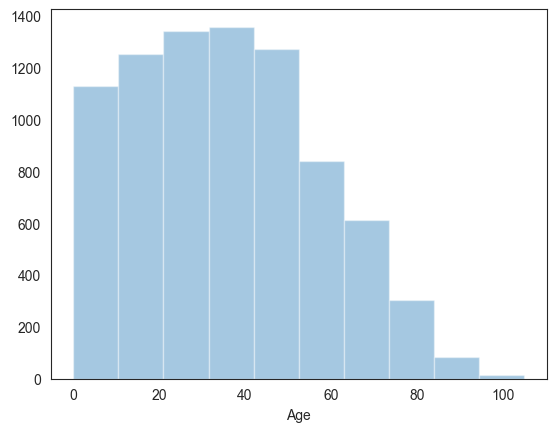

In [133]:
# checking the distrbution of Age
sns.distplot(census_df['Age'],kde=False,bins=10)

In [134]:
(census_df['Age'] == 0).sum()

70

In [135]:
census_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

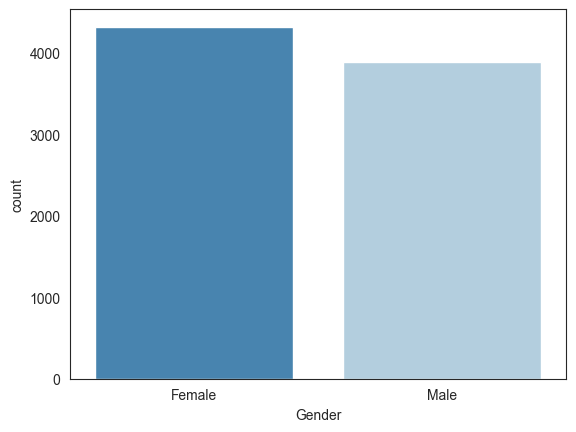

In [136]:
# checking the distribution of male to female in the population
sns.countplot(x="Gender", data=census_df, palette = "Blues_r");


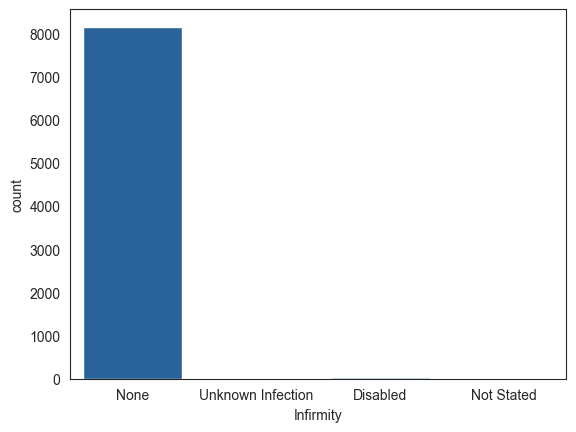

In [137]:
# checking the distribution of Infirmity in the population
infirmity= sns.countplot(x="Infirmity", data=census_df, palette = "Blues_r")
infirmity.get_figure().savefig('infirmity.png');

In [138]:
census_df["Infirmity"].value_counts()

None                 8157
Disabled               45
Unknown Infection       8
Not Stated              5
Name: Infirmity, dtype: int64

### Multivariate Analysis

### Population Pyramid

In [139]:
# defining the structure of the population pyramid
bins = [i for i in range(0, census_df["Age"].max() + 5, 4)]
labels = [str(i) + "-" + str(i+3) for i in range(0, census_df["Age"].max() + 3, 4)]
labels[-1] = '104+'
census_df["Age Range"] = pd.cut(census_df["Age"], bins=bins, labels= labels,right=False)
# https://www.geeksforgeeks.org/pandas-cut-method-in-python/

In [140]:
# assigning values to bins and labels
labels =['0-3','4-7','8-11','12-15','16-19','20+']
bins = [0,4,8,12,16,20,24]
bins =[i for i in range(0,25,4)]


In [141]:
#grouping gender and age range 
female = census_df.groupby(['Gender', 'Age Range']).size().Female
male = census_df.groupby(['Gender', 'Age Range']).size().Male

In [142]:
# defining x and y axis
x1 = male.values * -1
x2 = female.values
y1 = male.index
y2 = female.index

In [143]:
#assigning index
bin_index = female.index[::-1]

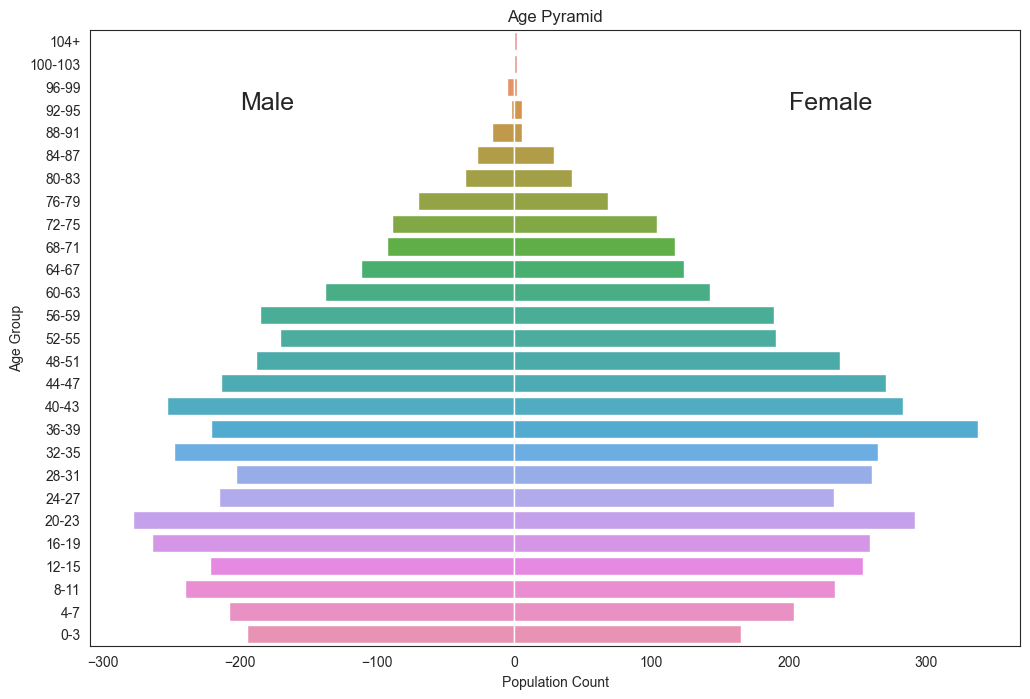

In [144]:
plt.figure(figsize=(12, 8))
bar = sns.barplot(x=x1, y=y1, order=bin_index)
bar = sns.barplot(x=x2, y=y2, order=bin_index)
plt.text(-200,3, 'Male',fontsize=18)
plt.text(200,3, 'Female',fontsize=18)
bar.set(xlabel="Population Count", ylabel="Age Group", title="Age Pyramid")
bar.get_figure().savefig('population_pyramid.png');

### Employment Trends

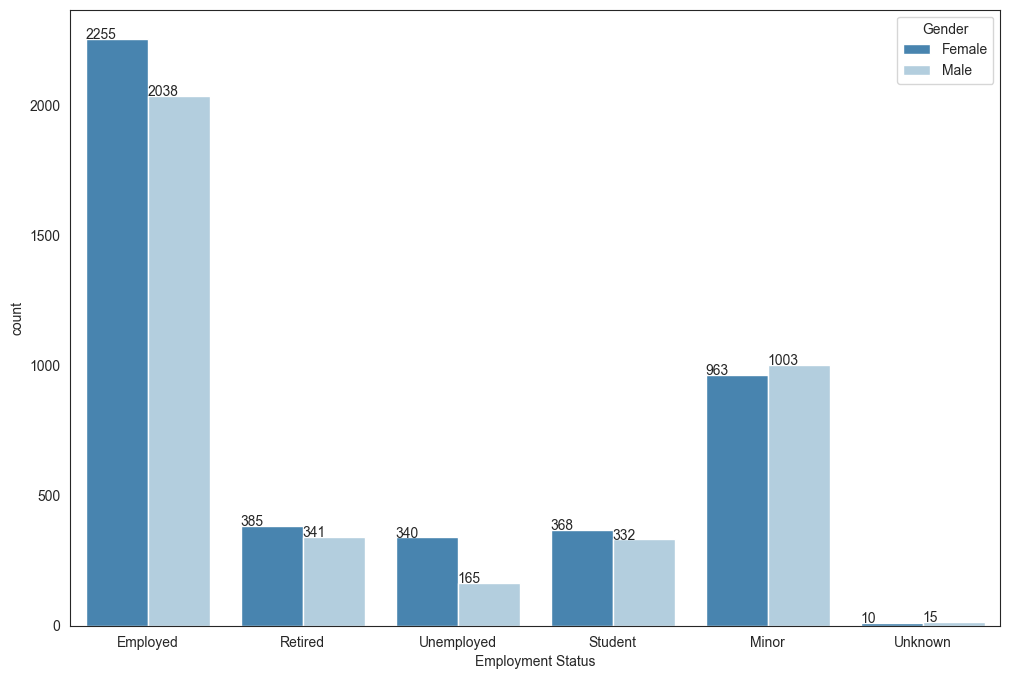

In [145]:
# checking the employment status 
plt.figure(figsize=(12, 8))
ax=sns.countplot(x="Employment Status",hue='Gender',data=census_df, palette = "Blues_r")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
ax.get_figure().savefig('employment.png');


In [146]:
census_df['Employment Status'].describe(include='all').T

count         8215
unique           6
top       Employed
freq          4293
Name: Employment Status, dtype: object

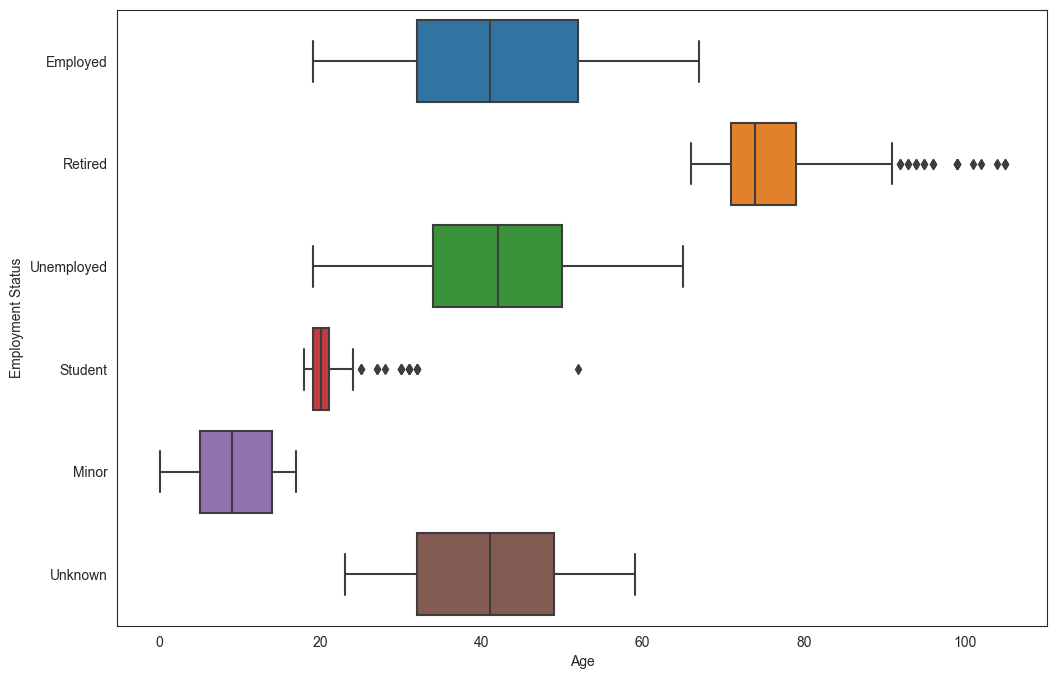

In [147]:
plt.figure(figsize=(12, 8))
agevsemploy=sns.boxplot(x="Age", y="Employment Status", data=census_df);

In [148]:
agevsemploy.get_figure().savefig('agevsemploy')

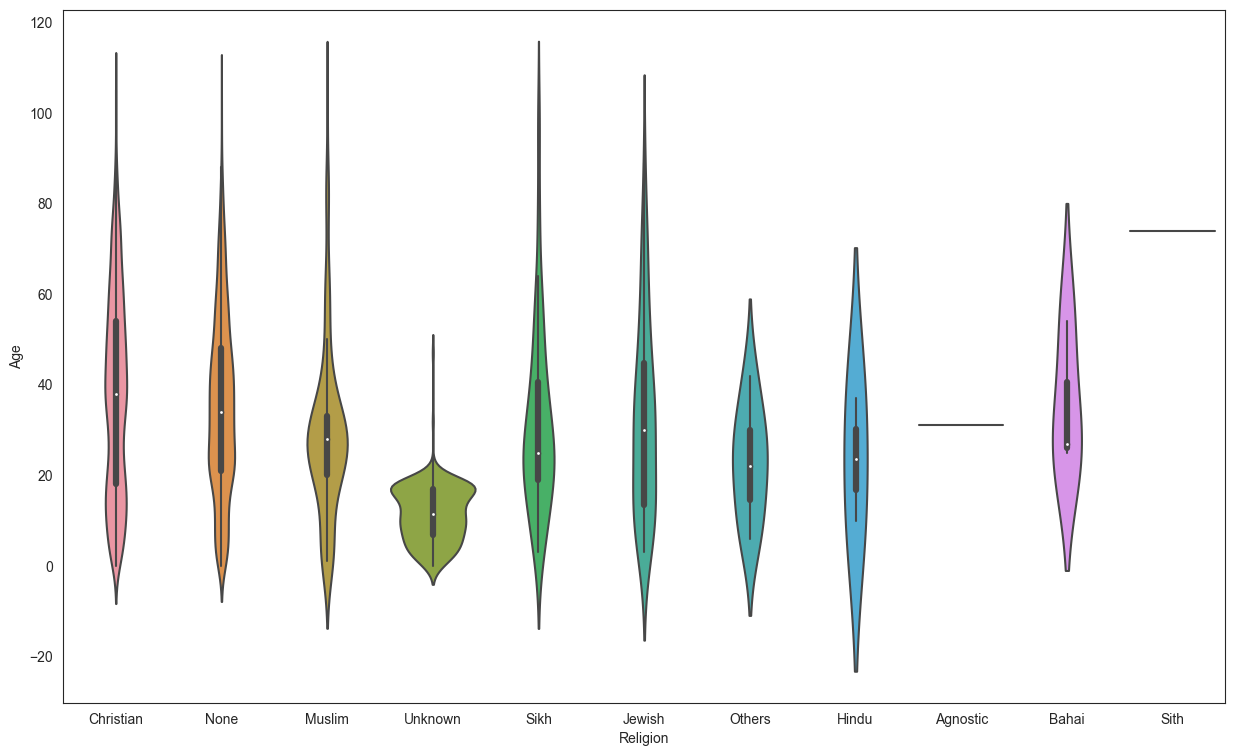

In [149]:
plt.figure(figsize=(15, 9))
rel_age=sns.violinplot(y="Age", x="Religion", data=census_df)
rel_age.get_figure().savefig('rel_age.png');

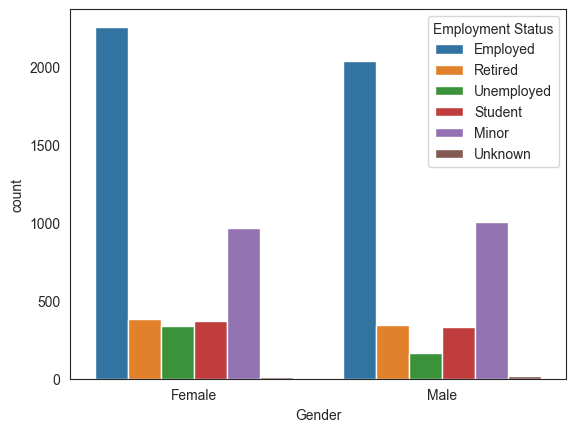

In [150]:
# checking the employment status of both gender
sns.countplot(x='Gender',hue='Employment Status',data=census_df);

In [151]:

address = census_df["House Number"].astype(str) + " " + census_df["Street"]

In [152]:

address.value_counts().max()

21

In [153]:
address.value_counts().min()

1

In [154]:
address.value_counts().mean()

2.8573913043478263

In [155]:
address.value_counts().mode()

0    2
dtype: int64

In [156]:
address.value_counts().median()

2.0

In [157]:
address.value_counts().describe()[1:].astype(int)

mean     2
std      1
min      1
25%      2
50%      2
75%      4
max     21
dtype: int32

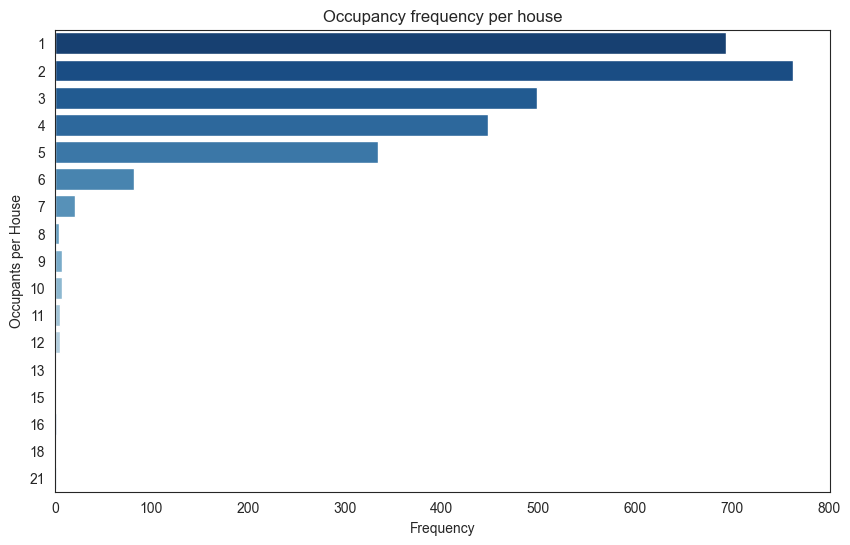

In [158]:
# plot to check the occupancy frequency per house

plt.figure(figsize=(10, 6))
bar1 = sns.countplot(y=address.value_counts(), palette="Blues_r")
bar1.set(xlabel="Frequency", ylabel="Occupants per House", title="Occupancy frequency per house")
bar1.get_figure().savefig('occupancy.png');

### Birth and Death Rate

In [159]:
# Assigning babies less than a year old to a variable
zero_years = len(census_df.query('`Age`== 0'))

In [160]:
# checking the number of children aged '0'
census_df.query('`Age`== 0')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment Status,Age Range
84,16,Andrews Wells,Phillip,Harvey,0,Son,Minor,Male,Child,None,Christian,Minor,0-3
228,8,Clementine Street,Hayley,Gregory,0,Daughter,Minor,Female,Child,None,None,Minor,0-3
540,23,Roberts Lane,Christopher,Bradley-Bennett,0,Son,Minor,Male,Child,None,Christian,Minor,0-3
589,36,Roberts Lane,Christian,Gibson,0,Son,Minor,Male,Child,None,None,Minor,0-3
797,1,Campbell Tunnel,Gerard,Thomson,0,Son,Minor,Male,Child,None,None,Minor,0-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,19,Castor Lane,Lindsey,Parsons,0,Daughter,Minor,Female,Child,None,None,Minor,0-3
7835,9,Walker Drive,Laura,Ellis,0,Daughter,Minor,Female,Child,None,Christian,Minor,0-3
8084,23,Wakefield Cove,Marian,Saunders,0,Granddaughter,Minor,Female,Child,None,Unknown,Minor,0-3
8096,30,Wakefield Cove,Craig,Jones-Thompson,0,Son,Minor,Male,Child,None,None,Minor,0-3


### Calculating the birth rate

 `birth rate= births/ population X 1000 `



In [161]:
zero_years = len(census_df.query('`Age`== 0'))
five_years = len(census_df.query('`Age`== 5'))
total_pop = len(census_df)


In [162]:
cbr_zero =zero_years/ total_pop * 1000
cbr_five = five_years /total_pop * 1000
print(f'The recent birth rate per 1000 is,', float(cbr_zero))
print(f'The previous birth rate per 1000 for the last five years is,', float(cbr_five) )

The recent birth rate per 1000 is, 8.520998174071819
The previous birth rate per 1000 for the last five years is, 12.659768715763846


In [163]:
# checking the difference in the birth rate
diff_cbr = cbr_zero - cbr_five
print(f'The difference in the birth rate over the years is,', int(diff_cbr))


The difference in the birth rate over the years is, -4


#### Observation

<p> From the calculations above, we can see there is a decline in the birth rate</p>



### Calculating the Death Rate

In [164]:
len(census_df.query("`Age`== '65-70'"))

0

In [165]:
count=print(census_df['Age Range'].value_counts()) 

20-23      570
36-39      559
40-43      536
16-19      523
32-35      513
44-47      485
12-15      476
8-11       474
28-31      464
24-27      448
48-51      425
4-7        412
56-59      374
52-55      362
0-3        360
60-63      281
64-67      236
68-71      210
72-75      193
76-79      138
80-83       78
84-87       56
88-91       22
92-95        8
96-99        7
104+         3
100-103      2
Name: Age Range, dtype: int64


In [166]:
# Checking the population for age range '64-67' vs '68-71'
age_above68 = len(census_df.query("`Age Range`== '64-67'"))
age_above72 = len(census_df.query("`Age Range`== '68-71'"))
tot_above68_72 = age_above68 - age_above72 / 4

# Checking the population for age range '72-75' vs '76-79'
age_above72 = len(census_df.query("`Age Range`== '72-75'"))
age_above76 = len(census_df.query("`Age Range`== '76-79'"))
tot_above72_76 = age_above72 - age_above76 / 4

# Checking the population for age range '80-83' vs '84-87'
age_above80 = len(census_df.query("`Age Range`== '80-83'"))
age_above84 = len(census_df.query("`Age Range`== '84-87'"))
tot_above80_84 = age_above80 - age_above84 / 4


# Checking the total population
total_old_pop = tot_above68_72 +tot_above72_76 + tot_above80_84
total_pop = len(census_df)
 
    
# Checking the crude death rate(no of deaths/total population per 1000)
death_rate = (total_old_pop / total_pop) *1000
print(f'The crude death rate per 1000 of the total population is, ', death_rate)


The crude death rate per 1000 of the total population is,  49.42178940961656


In [167]:
from pandas_profiling import ProfileReport
profile_report=ProfileReport(census_df)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]